# Lecture 19:  Natural Language Toolkit - NLTK
- Download data for practice analysis from the NLTK repository
- Explore word usage with NLTK’s __concordance__, __similar__, and __dispersion_plot__ functions
- Calculate a crude metric of the lexical diversity of a text by comparing the ratio of word __(token)__ types to total words
- Calculate the frequency of each word type in a text, and other word metrics using the __FreqDist__ function

__Reading material:__
- Read the introduction to Chapter 1 of the [NLTK Book](http://www.nltk.org/book/ch01.html). 

- Follow 1.2, 1.3, 1.4
- Follow Chapter 1, section 3 (all)
- Skim Chapter 1, section 5. This will give you a good overview of the issues in natural language
- Skim Chapter 3 for processing raw text processing.


`conda install nltk`

In [3]:
import nltk
print(nltk.__version__)

3.7


In [2]:
# nltk.download()
# nltk.download_shell()
# try running "nltk.download_shell()" or "nltk.download("book")" instead if there seems to be an issue using the downloader UI

In [42]:
nltk.download("book")

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/lijiayu/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /Users/lijiayu/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     /Users/lijiayu/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/lijiayu/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     /Users/lijiayu/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     /Users/lijiayu/nltk_data...
[nltk_data]    |   Package conll2002 is already up-to-date!
[nltk_data]    |

True

In [45]:
import nltk.book as book

In [46]:
print(book.text1)
print(type(book.text1))

<Text: Moby Dick by Herman Melville 1851>
<class 'nltk.text.Text'>


In [47]:
# Searching Text 搜索文本
book.text1.concordance("monstrous")

Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u


A concordance permits us to see words in context. For example, we saw that monstrous occurred in contexts such as ``the ___ pictures`` and ``a ___ size``. What other words appear in a similar range of contexts? We can find out by using "similar"

索引允许我们在上下文中查看单词。 例如，我们看到 monstrous 出现在诸如“the ___ pictures”和“a ___ size”等语境中。 在类似的上下文范围内出现了哪些其他词？ 我们可以通过使用“similar”来找出

In [48]:
# To find other words that appear in a similar range of contexts
book.text1.similar("monstrous")

true contemptible christian abundant few part mean careful puzzled
mystifying passing curious loving wise doleful gamesome singular
delightfully perilous fearless


``common_contexts``允许我们仅检查由两个或多个单词共享的上下文，例如monstrous 和true。我们必须用方括号和括号将这些词括起来，并用逗号分隔

In [49]:
book.text1.common_contexts(["monstrous", "true"])

the_pictures


In [50]:
book.text2.similar("monstrous")

very so exceedingly heartily a as good great extremely remarkably
sweet vast amazingly


In [51]:
book.text2.common_contexts(["monstrous", "very"])

am_glad a_pretty a_lucky is_pretty be_glad


自动检测文本中出现的特定单词并显示出现在相同上下文中的某些单词是一回事。但是，我们也可以确定一个词在文本中的位置：它从开头出现了多少个词。该位置信息可以使用散布图显示。每个条纹代表一个单词的实例，每一行代表整个文本

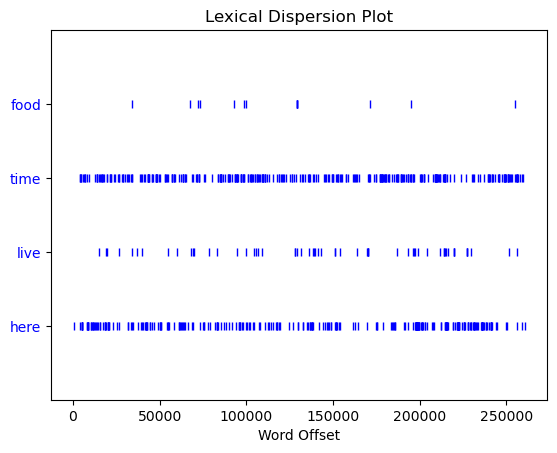

In [52]:
book.text1.dispersion_plot(["food", "time", "live", "here"])  # dispersion_plot: 色散图

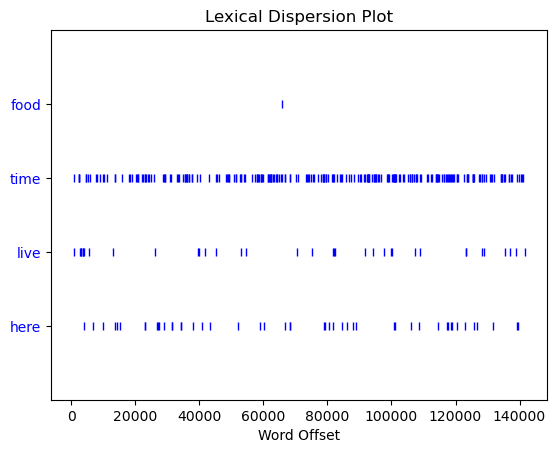

In [12]:
book.text2.dispersion_plot(["food", "time", "live", "here"])

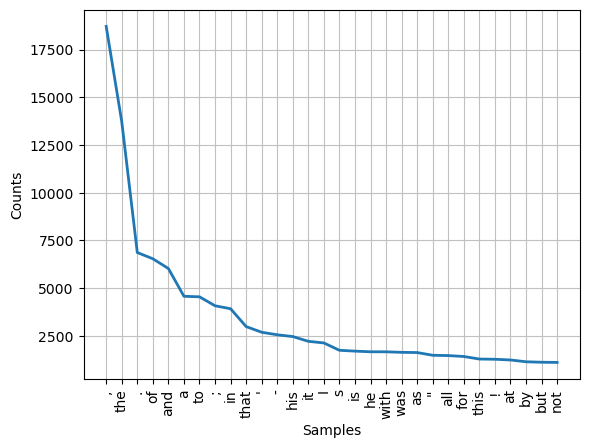

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [14]:
# to get frequency distribution of some text
# creat frequency distribution of text1 object
fdist1=book.FreqDist(book.text1)
# print(fdist1.most_common(5))
fdist1.plot(30, cumulative=False)  # 30: sample数量

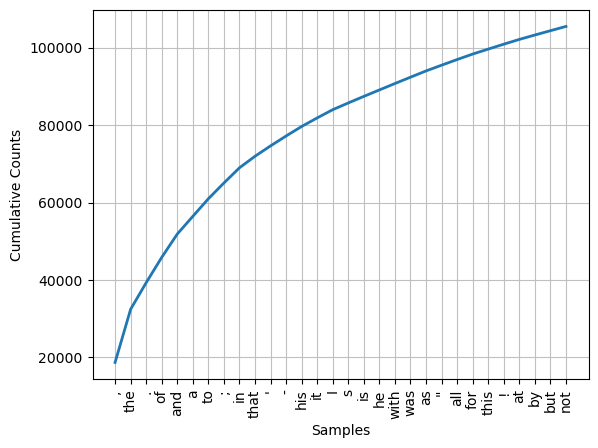

<AxesSubplot: xlabel='Samples', ylabel='Cumulative Counts'>

In [15]:
fdist1.plot(30, cumulative=True)

In [16]:
fdist1['monstrous']

10

In [17]:
fdist1.freq('monstrous')

3.834076505162584e-05

In [20]:
fdist1.freq('the')

0.052607363727335814

In [18]:
fdist1.N()  # total number of tokens 代币总数 返回此 FreqDist 记录的样本结果总数

260819

In [23]:
fdist1.most_common(10)

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982)]

In [53]:
# let's try generating some random text
# 尝试生成一些我们刚刚看到的各种样式的随机文本。为此，我们键入文本的名称，然后键入术语generate
book.text1.generate()

Building ngram index...


long , from one to the top - mast , and no coffin and went out a sea
captain -- this peaking of the whales . , so as to preserve all his
might had in former years abounding with them , they toil with their
lances , strange tales of Southern whaling . at once the bravest
Indians he was , after in vain strove to pierce the profundity . ?"
then ?" a levelled flame of pale , And give no chance , watch him ;
though the line , it is to be gainsaid . he being


'long , from one to the top - mast , and no coffin and went out a sea\ncaptain -- this peaking of the whales . , so as to preserve all his\nmight had in former years abounding with them , they toil with their\nlances , strange tales of Southern whaling . at once the bravest\nIndians he was , after in vain strove to pierce the profundity . ?"\nthen ?" a levelled flame of pale , And give no chance , watch him ;\nthough the line , it is to be gainsaid . he being'

首先根据出现的单词和标点符号找出文本从头到尾的长度。我们使用术语len来获取某物的长度，我们将在此处将其应用于创世记

In [54]:
len(book.text1)

260819

通过将sorted()包装在 Python 表达式set(text1)周围，我们获得了一个排序的词汇表列表，从各种标点符号开始，然后是以A开头的单词。所有大写单词都在小写单词之前

In [55]:
sorted(set(book.text1))

['!',
 '!"',
 '!"--',
 "!'",
 '!\'"',
 '!)',
 '!)"',
 '!*',
 '!--',
 '!--"',
 "!--'",
 '"',
 '"\'',
 '"--',
 '"...',
 '";',
 '$',
 '&',
 "'",
 "',",
 "',--",
 "'-",
 "'--",
 "';",
 '(',
 ')',
 '),',
 ')--',
 ').',
 ').--',
 '):',
 ');',
 ');--',
 '*',
 ',',
 ',"',
 ',"--',
 ",'",
 ",'--",
 ',)',
 ',*',
 ',--',
 ',--"',
 ",--'",
 '-',
 '--',
 '--"',
 "--'",
 '--\'"',
 '--(',
 '---"',
 '---,',
 '.',
 '."',
 '."*',
 '."--',
 ".'",
 '.\'"',
 '.)',
 '.*',
 '.*--',
 '.,',
 '.--',
 '.--"',
 '...',
 '....',
 '.]',
 '000',
 '1',
 '10',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '11',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '12',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '13',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '14',
 '144',
 '1492',
 '15',
 '150',
 '15th',
 '16',
 '1652',
 '1668',
 '1671',
 '1690',
 '1695',
 '16th',
 '17',
 '1726',
 '1729',
 '1750',
 '1772',
 '1775

我们通过询问集合中的项目数间接发现了词汇表的大小，我们可以再次使用len来获得这个数字。尽管它有 260,819 个记号，但这本书只有 19,317 个不同的单词，或“单词类型”

In [67]:
len(set(book.text1))

19317

In [56]:
print(book.text1.count("food")/len(book.text1))
print(fdist1.freq('the'))
print(book.text1.count("the")/len(book.text1))

5.367707107227618e-05
0.052607363727335814
0.052607363727335814


In [57]:
import urllib
url = "http://www.gutenberg.org/files/863/863-0.txt"
# urllib 包是 python 的 URL 处理模块。它用于获取 URL（统一资源定位器）。它使用 urlopen 函数并能够使用各种不同的协议获取 URL
response = urllib.request.urlopen(url)  
# read()返回一个str. 从.decode()UTF-8解码为Python的内部 unicode 格式
raw = response.read().decode('utf8')

In [58]:
print(type(raw))
print(raw)

<class 'str'>
﻿The Project Gutenberg eBook of The Mysterious Affair at Styles, by Agatha Christie

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this eBook or online at
www.gutenberg.org. If you are not located in the United States, you
will have to check the laws of the country where you are located before
using this eBook.

Title: The Mysterious Affair at Styles

Author: Agatha Christie

Release Date: March, 1997 [eBook #863]
[Most recently updated: December 26, 2021]

Language: English

Character set encoding: UTF-8

Produced by: Charles Keller

*** START OF THE PROJECT GUTENBERG EBOOK THE MYSTERIOUS AFFAIR AT STYLES ***




The Mysterious Affair at Styles

by Agatha Christie

Contents


CHAPTER I. I GO TO STYLES
CHAPTER II. THE 16TH AND 17TH OF JULY
CHAPTER III. THE NIGH

In [70]:
i0 = raw.rfind("CHAPTER I. I GO TO STYLES")  # i0: starting index
print(raw[i0:i0+10])

CHAPTER I.


In [60]:
i1 = raw.rfind("THE END")
print(raw[i1:i1+7])

THE END


In [61]:
text = raw[i0:i1+7]
print(text[:200])
print('====')
print(text[-100:])

CHAPTER I. I GO TO STYLES
CHAPTER II. THE 16TH AND 17TH OF JULY
CHAPTER III. THE NIGHT OF THE TRAGEDY
CHAPTER IV. POIROT INVESTIGATES
CHAPTER V. “IT ISN’T STRYCHNINE, IS IT?”
CHAPTER VI. THE INQU
====
 mind. Console
yourself, my friend. We may hunt together again, who knows? And then——”


THE END


In [62]:
print(type(text))

<class 'str'>


In [63]:
from nltk import word_tokenize
tokens = word_tokenize(text)  # convert word to tokens
print(type(tokens))
print(type(tokens[0]))
print(tokens[:10])

<class 'list'>
<class 'str'>
['CHAPTER', 'I.', 'I', 'GO', 'TO', 'STYLES', 'CHAPTER', 'II', '.', 'THE']


In [64]:
text = nltk.Text(tokens)
type(text)

nltk.text.Text

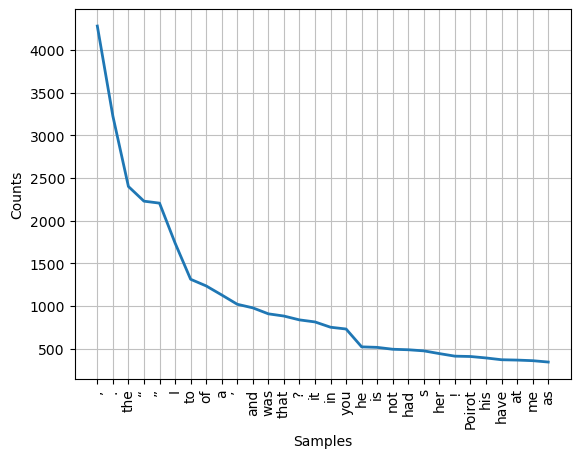

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [65]:
d = nltk.FreqDist(text)
d.plot(30, cumulative=False)

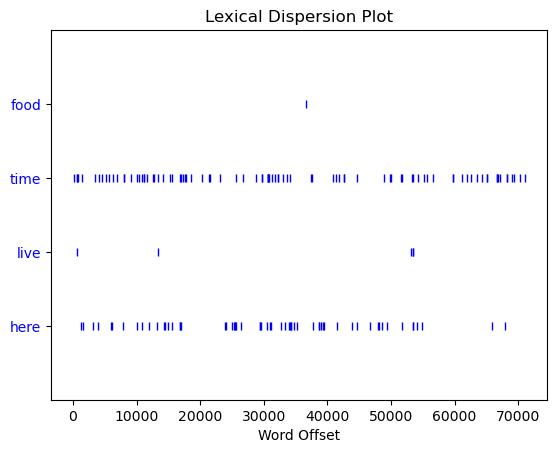

In [66]:
text.dispersion_plot(["food", "time", "live", "here"])